In [34]:
import pandas as pd

In [35]:
df = pd.read_csv("Online Retail.csv", encoding="latin1")


In [36]:
df.shape


(541909, 8)

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [42]:
df = df.dropna(subset=["CustomerID"])

In [43]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]


In [44]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [46]:
import datetime as dt


In [47]:
df = df.dropna(subset=["Description"])


In [48]:
df = df[df["Quantity"] > 0]


In [49]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [50]:
df = df[df["UnitPrice"] > 0]


In [54]:
df = df.dropna(subset=["CustomerID"])
df["CustomerID"] = df["CustomerID"].astype(int)  


In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [56]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [57]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [58]:
df["InvoiceDate"].isnull().sum()

np.int64(0)

In [59]:
ref_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)


In [60]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (ref_date - x.max()).days,  
    "InvoiceNo": "nunique",                             
    "TotalPrice": "sum"                                 
}).reset_index()

In [61]:
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


In [62]:
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40


In [63]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])


In [64]:
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])


In [65]:
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])


In [66]:
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)


In [67]:
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0       12346      326          1  77183.60       1       1       4       114
1       12347        2          7   4310.00       4       4       4       444
2       12348       75          4   1797.24       2       3       4       234
3       12349       19          1   1757.55       3       1       4       314
4       12350      310          1    334.40       1       1       2       112


In [68]:
def segment(rfm_score):
    if rfm_score.startswith("4"):
        return "Champions"
    elif rfm_score.startswith("3"):
        return "Loyal Customers"
    elif rfm_score.startswith("2"):
        return "At Risk"
    else:
        return "Lost Customers"

In [69]:
rfm["Segment"] = rfm["RFM_Score"].apply(segment)


In [70]:
print(rfm["Segment"].value_counts())


Segment
Champions          1125
Lost Customers     1084
At Risk            1066
Loyal Customers    1063
Name: count, dtype: int64


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

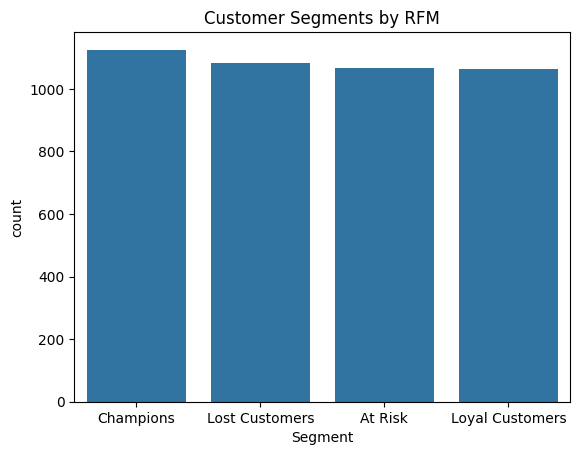

In [72]:
sns.countplot(x="Segment", data=rfm, order=rfm["Segment"].value_counts().index)
plt.title("Customer Segments by RFM")
plt.show()

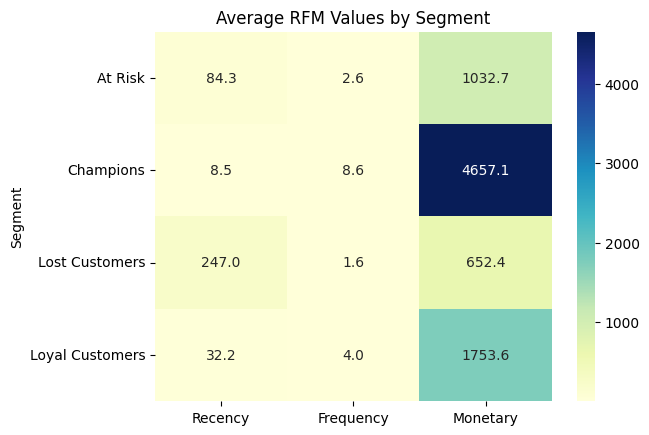

In [73]:
rfm_grouped = rfm.groupby("Segment")[["Recency","Frequency","Monetary"]].mean().reset_index()
sns.heatmap(rfm_grouped.set_index("Segment"), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average RFM Values by Segment")
plt.show()

## Marketing Ideas 

**Champions** : Reward them with loyalty programs, exclusive offers, and early product launches.  

**Loyal Customers** : Encourage referrals, give them early access to sales, and upsell/cross-sell.  

**Potential Loyalist** : Offer discounts for second purchase, nurture them into loyal customers.  

**New Customers** : Welcome them with onboarding emails, small discounts, and product recommendations.  

**At Risk** : Send win-back campaigns, discounts, and reminders about what they loved before.  

**Lost Customers** : Try re-engagement campaigns or surveys to understand why they left.  

